# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display number of unique mice IDs
print("Number of unique mice IDs: ", len(merged_data['Mouse ID'].unique()))






Number of unique mice IDs:  249


In [2]:
# Check for duplicates
duplicates = merged_data.loc[merged_data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
print("Mouse IDs with duplicate time points: ", duplicates)

Mouse IDs with duplicate time points:  ['g989']


In [3]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
display(merged_data.loc[merged_data['Mouse ID'] == duplicates[0]])



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a new DataFrame without the data for the mouse ID with duplicate time points
cleaned_data = merged_data.loc[merged_data['Mouse ID'] != duplicates[0]]

# Checking the number of mice in the clean DataFrame.
print("Number of unique mice IDs after cleaning: ", len(cleaned_data['Mouse ID'].unique()))

Number of unique mice IDs after cleaning:  248


# Summary Statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Assemble the resulting series into a single summary DataFrame.
summary_stats = summary_stats.rename(columns={'mean':'Mean Tumor Volume', 'median':'Median Tumor Volume', 'var':'Tumor Volume Variance', 'std':'Tumor Volume Std. Dev.', 'sem':'Tumor Volume Std. Err.'})

# Display summary statistics
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [6]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

summary_stats = cleaned_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

# Flatten column names
summary_stats.columns = summary_stats.columns.map('_'.join).str.strip()

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = summary_stats.rename(columns={'Tumor Volume (mm3)_mean':'Mean Tumor Volume', 'Tumor Volume (mm3)_median':'Median Tumor Volume', 'Tumor Volume (mm3)_var':'Tumor Volume Variance', 'Tumor Volume (mm3)_std':'Tumor Volume Std. Dev.', 'Tumor Volume (mm3)_sem':'Tumor Volume Std. Err.'})

# Display summary statistics
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

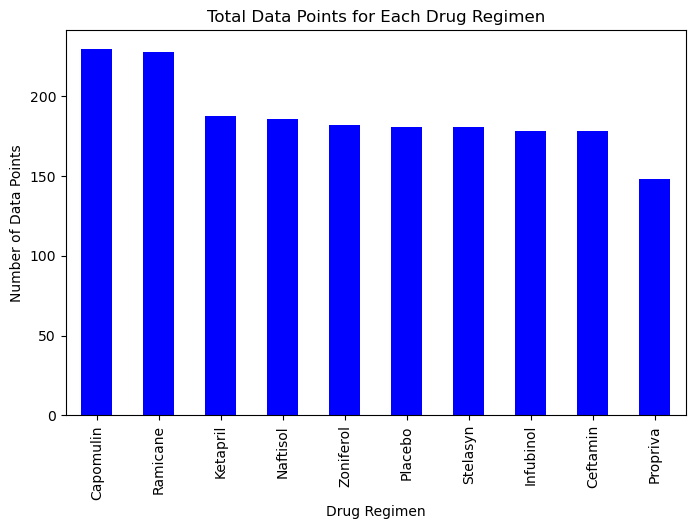

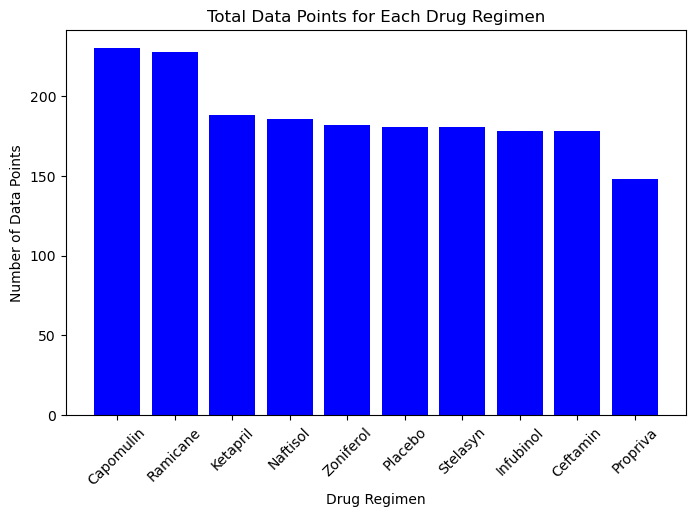

In [7]:
# Calculate number of data points for each drug regimen
regimen_data_points = cleaned_data['Drug Regimen'].value_counts()

# Create a bar chart using Pandas
regimen_data_points.plot(kind='bar', figsize=(8,5), color='blue')

# Set chart title and labels
plt.title('Total Data Points for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')

# Show the plot
plt.show()

# Create a bar chart using Matplotlib
plt.figure(figsize=(8,5))
plt.bar(regimen_data_points.index, regimen_data_points.values, color='blue')

# Set chart title and labels
plt.title('Total Data Points for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

<AxesSubplot:title={'center':'Gender Distribution Using Pandas'}, ylabel='Sex'>

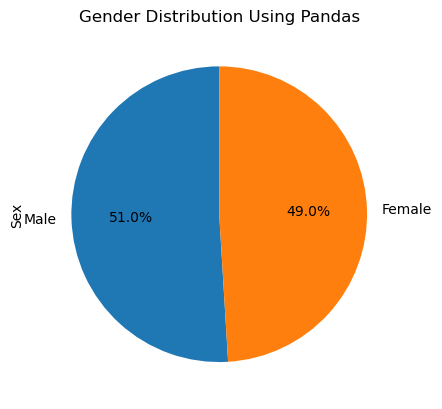

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Calculate gender distribution
gender_count = cleaned_data['Sex'].value_counts()

# Generate pie chart with Pandas
gender_count.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Gender Distribution Using Pandas')


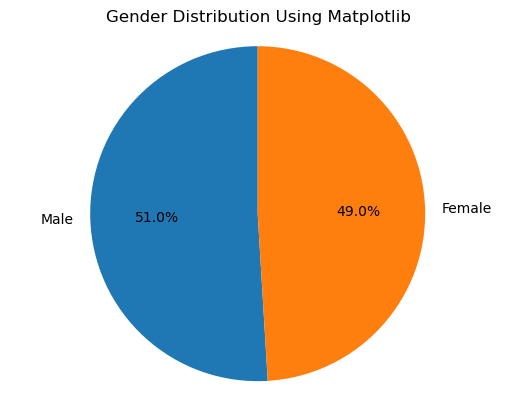

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ['Male', 'Female']
sizes = [gender_count['Male'], gender_count['Female']]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title('Gender Distribution Using Matplotlib')
plt.show()

## Quartiles, Outliers and Boxplots

In [10]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
promising_regimens = cleaned_data[cleaned_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_vol = promising_regimens.groupby(['Mouse ID', 'Drug Regimen'])['Tumor Volume (mm3)'].last().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543
...,...,...,...
95,y769,Ceftamin,68.594745
96,y793,Capomulin,31.896238
97,y865,Ceftamin,64.729837
98,z578,Ramicane,30.638696


In [11]:
# Group the cleaned_data DataFrame by Mouse ID and find the last (i.e. greatest) time point for each mouse
last_timepoint = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge the last_timepoint DataFrame with the cleaned_data DataFrame to get the final tumor volume for each mouse
final_tumor_vol = pd.merge(last_timepoint, cleaned_data, on=['Mouse ID', 'Timepoint'])

# Create a list of the four most promising drug regimens
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_rows = final_tumor_vol.loc[final_tumor_vol['Drug Regimen'] == drug]
    
    # Get the final tumor volumes for the current drug and append them to the tumor_volumes list
    tumor_volumes.append(drug_rows['Tumor Volume (mm3)'].values)

# Calculate the quartiles and IQR for each drug and print the results
for i in range(len(treatments)):
    q1 = np.percentile(tumor_volumes[i], 25)
    q3 = np.percentile(tumor_volumes[i], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = [x for x in tumor_volumes[i] if x < lower_bound or x > upper_bound]
    print(f"{treatments[i]}:")
    print(f" - Quartile 1: {q1}")
    print(f" - Quartile 3: {q3}")
    print(f" - Interquartile Range: {iqr}")
    print(f" - Lower Bound: {lower_bound}")
    print(f" - Upper Bound: {upper_bound}")
    print(f" - Potential Outliers: {outliers}")


Capomulin:
 - Quartile 1: 32.37735684
 - Quartile 3: 40.1592203
 - Interquartile Range: 7.781863460000004
 - Lower Bound: 20.70456164999999
 - Upper Bound: 51.83201549
 - Potential Outliers: []
Ramicane:
 - Quartile 1: 31.56046955
 - Quartile 3: 40.65900627
 - Interquartile Range: 9.098536719999998
 - Lower Bound: 17.912664470000003
 - Upper Bound: 54.30681135
 - Potential Outliers: []
Infubinol:
 - Quartile 1: 54.04860769
 - Quartile 3: 65.52574285
 - Interquartile Range: 11.477135160000003
 - Lower Bound: 36.83290494999999
 - Upper Bound: 82.74144559000001
 - Potential Outliers: [36.3213458]
Ceftamin:
 - Quartile 1: 48.72207785
 - Quartile 3: 64.29983003
 - Interquartile Range: 15.577752179999997
 - Lower Bound: 25.355449580000002
 - Upper Bound: 87.66645829999999
 - Potential Outliers: []


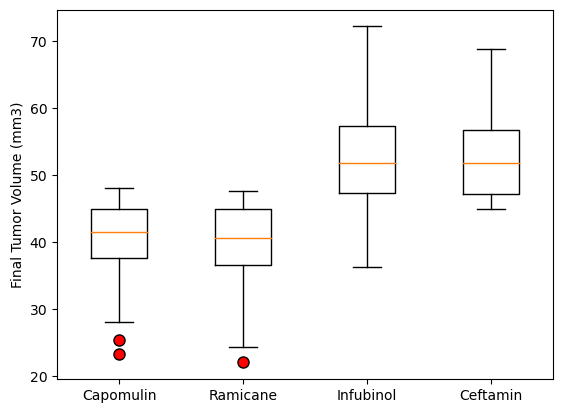

In [12]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Create a list of the four treatment regimens
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to hold the final tumor volumes for each treatment
final_tumor_volumes = []

# Loop through each treatment
for treatment in treatments:
    # Locate the rows in the merged DataFrame that correspond to each treatment
    treatment_data = merged_data.loc[merged_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Append the resulting final tumor volumes for each drug to the empty list
    final_tumor_volumes.append(treatment_data)

# Create a box plot of the final tumor volumes for each treatment
fig, ax = plt.subplots()
ax.boxplot(final_tumor_volumes, labels=treatments, showfliers=True, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8})

# Set the y-axis label
ax.set_ylabel('Final Tumor Volume (mm3)')

# Show the plot
plt.show()

## Line and Scatter Plots

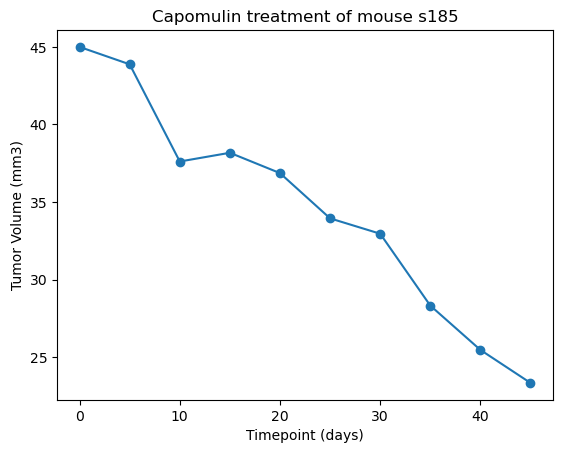

In [13]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Select a single mouse that was treated with Capomulin
capomulin_mouse = merged_data.loc[(merged_data['Drug Regimen'] == 'Capomulin') & (merged_data['Mouse ID'] == 's185')]

# Create a line plot of tumor volume versus time point for the selected mouse
plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'], marker='o')

# Set the x-axis label
plt.xlabel('Timepoint (days)')

# Set the y-axis label
plt.ylabel('Tumor Volume (mm3)')

# Set the title
plt.title('Capomulin treatment of mouse s185')

# Show the plot
plt.show()


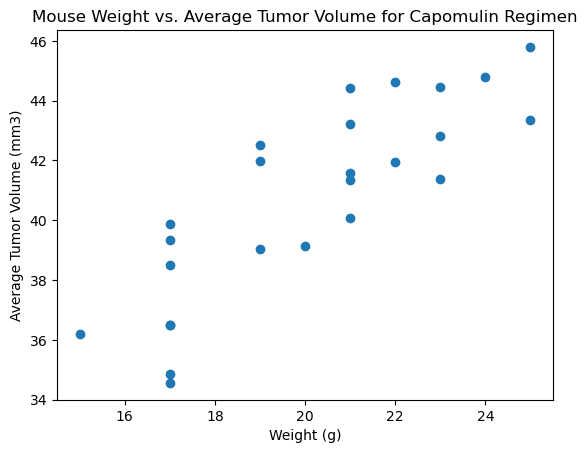

In [14]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Calculate the average tumor volume for each mouse on the Capomulin regimen
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

capomulin_df = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]
avg_tumor_vol_df = pd.DataFrame(capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean())

# Merge the average tumor volume with the mouse weight data
weight_df = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]
weight_df = weight_df[["Mouse ID", "Weight (g)"]].drop_duplicates()
merged_weight_df = pd.merge(avg_tumor_vol_df, weight_df, on="Mouse ID")

# Generate the scatter plot
plt.scatter(merged_weight_df["Weight (g)"], merged_weight_df["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")

# Show the plot
plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.83.


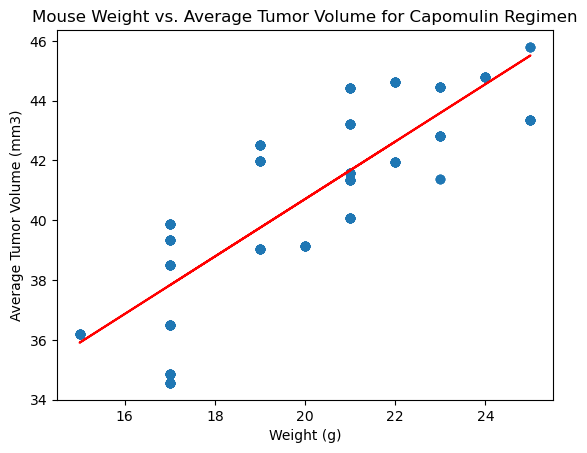

In [15]:
from scipy.stats import linregress

# Calculate the average tumor volume for each mouse on the Capomulin regimen
capomulin_df = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]
avg_tumor_vol_df = pd.DataFrame(capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean())

# Merge the average tumor volume data with the mouse weight data
merged_avg_weight_df = pd.merge(avg_tumor_vol_df, capomulin_df[["Mouse ID", "Weight (g)"]], on="Mouse ID")

# Calculate the correlation coefficient between mouse weight and average tumor volume
corr_coef = round(merged_avg_weight_df["Tumor Volume (mm3)"].corr(merged_avg_weight_df["Weight (g)"]), 2)
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {corr_coef}.")

# Create a scatter plot of mouse weight versus average tumor volume
plt.scatter(merged_avg_weight_df["Weight (g)"], merged_avg_weight_df["Tumor Volume (mm3)"])

# Calculate the linear regression model for mouse weight and average tumor volume
slope, intercept, rvalue, pvalue, stderr = linregress(merged_avg_weight_df["Weight (g)"], merged_avg_weight_df["Tumor Volume (mm3)"])
regress_values = merged_avg_weight_df["Weight (g)"] * slope + intercept

# Add the linear regression line to the scatter plot
plt.plot(merged_avg_weight_df["Weight (g)"], regress_values, color="red")

# Set the title and axis labels for the scatter plot
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Display the scatter plot
plt.show()